In [1]:
# import needed packages
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
# load data
directory_path = "PSA_data"

file_pattern = "*1007.csv"

# Combine the directory path with the file pattern
files = glob.glob(os.path.join(directory_path, file_pattern))

# Read and concatenate the CSV files
dataframes = []

for file in files:
    df = pd.read_csv(file)
    dataframes.append(df)
    
df_all = pd.concat(dataframes, ignore_index=True)

In [3]:
mask1 = df_all["network"]=="GNEO1"
mask2 = df_all["rel change"]==1
mask3 = df_all["parameter"]=="alphaEO" # just to only get 1170 ICs

GNEO1 = df_all[mask1 & mask2 & mask3]

GNEO1

,network,num variables,parameter,parameter value,rel change,ic gata6,ic nanog,ic esrrb,ic oct4,ss gata6,...,num sfp,mean epi gata6,mean epi nanog,mean pre gata6,mean pre nanog,condition 1,condition 2,time ss,distance,velocity
11270,GNEO1,4,alphaEO,12.0,1.0,0.100000,0.10000,0.994172,13.0,13.602541,...,2,1.248235,11.44972,13.602124,2.425683,True,True,25.891939,13.701374,0.529175
11271,GNEO1,4,alphaEO,12.0,1.0,0.111826,0.10000,0.994172,13.0,13.601757,...,2,1.248235,11.44972,13.602124,2.425683,True,True,25.875231,13.688930,0.529036
11272,GNEO1,4,alphaEO,12.0,1.0,0.125050,0.10000,0.994172,13.0,13.606195,...,2,1.248235,11.44972,13.602124,2.425683,True,True,26.591200,13.680373,0.514470
11273,GNEO1,4,alphaEO,12.0,1.0,0.139838,0.10000,0.994172,13.0,13.606122,...,2,1.248235,11.44972,13.602124,2.425683,True,True,26.610545,13.665726,0.513546
11274,GNEO1,4,alphaEO,12.0,1.0,0.156375,0.10000,0.994172,13.0,13.608872,...,2,1.248235,11.44972,13.602124,2.425683,True,True,26.461260,13.652204,0.515932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12392,GNEO1,4,alphaEO,12.0,1.0,0.305788,4.47124,12.931263,13.0,1.248488,...,2,1.248235,11.44972,13.602124,2.425683,True,True,22.487963,7.042200,0.313154
12393,GNEO1,4,alphaEO,12.0,1.0,0.341950,4.47124,12.931263,13.0,1.248499,...,2,1.248235,11.44972,13.602124,2.425683,True,True,22.551204,7.037465,0.312066
12394,GNEO1,4,alphaEO,12.0,1.0,0.382388,4.47124,12.931263,13.0,1.248503,...,2,1.248235,11.44972,13.602124,2.425683,True,True,22.618252,7.032375,0.310916
12395,GNEO1,4,alphaEO,12.0,1.0,0.427608,4.47124,12.931263,13.0,1.248498,...,2,1.248235,11.44972,13.602124,2.425683,True,True,22.689227,7.026942,0.309704


In [4]:
ICs = GNEO1[["ic gata6", "ic nanog", "ic esrrb", "ic oct4"]].to_numpy()

ICs

array([[ 0.1       ,  0.1       ,  0.99417171, 13.        ],
       [ 0.1118258 ,  0.1       ,  0.99417171, 13.        ],
       [ 0.12505009,  0.1       ,  0.99417171, 13.        ],
       ...,
       [ 0.38238778,  4.47124023, 12.93126314, 13.        ],
       [ 0.42760818,  4.47124023, 12.93126314, 13.        ],
       [ 0.47817625,  4.47124023, 12.93126314, 13.        ]])

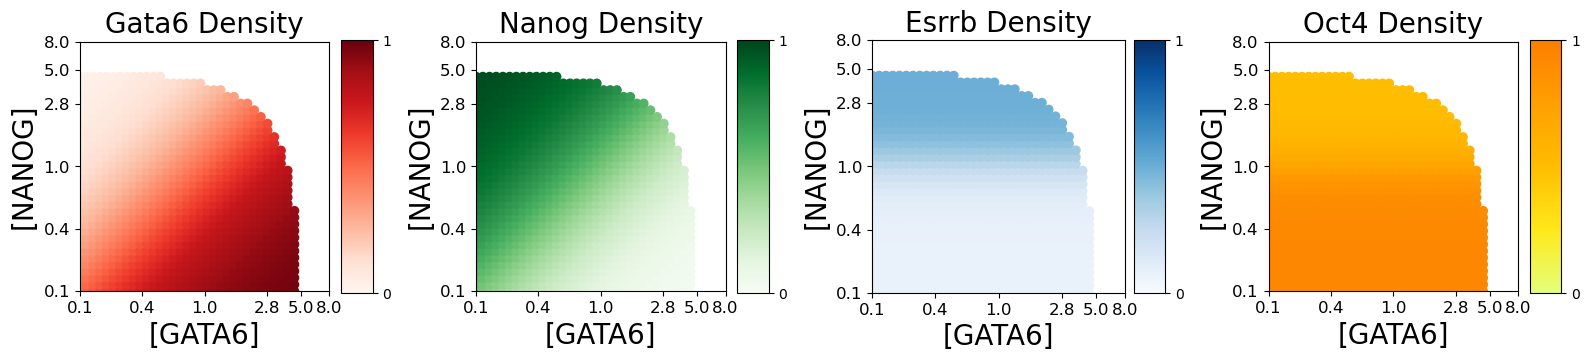

In [59]:
gatananog = ICs[:,0]+ICs[:,1]
esrrboct = ICs[:,2]+ICs[:,3]

gata_density = ICs[:,0]/(gatananog)
nanog_density = ICs[:,1]/(gatananog)
esrrb_density = ICs[:,2]/(esrrboct)
oct_density = ICs[:,3]/(esrrboct)

font_size=20
subtitles=('Gata6 Density','Nanog Density','Esrrb Density','Oct4 Density')

fig, axs = plt.subplots(1, 4, figsize=(16,4))

for ax,title in zip(axs, subtitles):
    ax.set_title(f"{title}", fontsize=font_size)
    ax.set_xlabel("[GATA6]", fontsize=font_size)
    ax.set_ylabel("[NANOG]", fontsize=font_size)
    ax.set_xscale("log", base=2)
    ax.set_yscale("log", base=2)

    xy = np.array([0.125, 0.35355339, 1., 2.82842712, 5., 8.])
    #xy = np.linspace(0,7, num=10)
    
    ax.set_xticks(xy) # position
    #ax.set_xticklabels(xy.astype(np.int32))  # label
    ax.set_xticklabels(np.around(xy,1)) 
    ax.set_yticks(xy) # position
    #ax.set_yticklabels(xy.astype(np.int32))  # label
    ax.set_yticklabels(np.around(xy,1))
    ax.tick_params(axis='both', which='both', labelsize=12)

    ax.set_xlim(xy[0], xy[-1])
    ax.set_ylim(xy[0], xy[-1])
    ax.set_aspect("equal")
    

gata=axs[0].scatter(ICs[:,0], ICs[:,1], c=gata_density, cmap="Reds", vmin=0, vmax=1)
cbar_gata = plt.colorbar(gata, ax=axs[0], fraction=0.108, pad=0.04, aspect=8)
cbar_gata.set_ticks([0, 1])
#cbar_gata.set_label('Gata6 Density', fontsize=15)

nanog=axs[1].scatter(ICs[:,0], ICs[:,1], c=nanog_density, cmap="Greens", vmin=0, vmax=1)
cbar_nanog = plt.colorbar(nanog, ax=axs[1], fraction=0.108, pad=0.04, aspect=8)
cbar_nanog.set_ticks([0, 1])
#cbar_nanog.set_label('Nanog Density', fontsize=15)

esrrb=axs[2].scatter(ICs[:,0], ICs[:,1], c=esrrb_density, cmap="Blues", vmin=0, vmax=1)
cbar_esrrb = plt.colorbar(esrrb, ax=axs[2], fraction=0.108, pad=0.03, aspect=8)
cbar_esrrb.set_ticks([0, 1])
#cbar_esrrb.set_label('Esrrb Density', fontsize=15)

oct4=axs[3].scatter(ICs[:,0], ICs[:,1], c=oct_density, cmap="Wistia", vmin=0, vmax=1)
cbar_oct4 = plt.colorbar(oct4, ax=axs[3], fraction=0.108, pad=0.04, aspect=8)
cbar_oct4.set_ticks([0, 1])
#cbar_oct4.set_label('Oct4 Density', fontsize=15)


plt.tight_layout()
plt.savefig("1127 initial conditions.pdf", dpi=600)

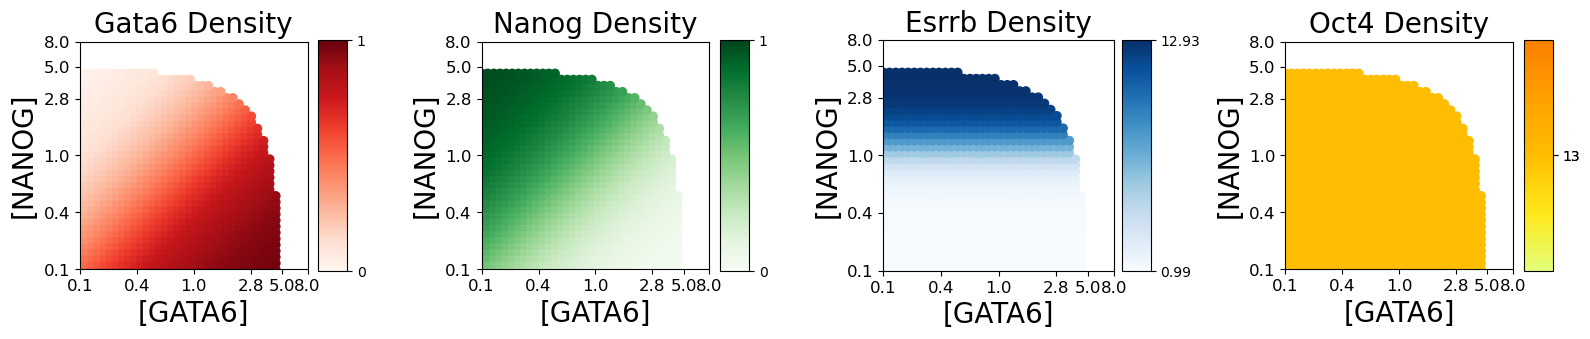

In [9]:
gatananog = ICs[:,0]+ICs[:,1]
esrrboct = ICs[:,2]+ICs[:,3]

gata_density = ICs[:,0]/(gatananog)
nanog_density = ICs[:,1]/(gatananog)

# changed to absolute values - only intersted in esrrb and oct4
# so i only edit the plots related to those.
esrrb_density = ICs[:,2]
oct_density = ICs[:,3]

font_size=20
subtitles=('Gata6 Density','Nanog Density','Esrrb Density','Oct4 Density')

fig, axs = plt.subplots(1, 4, figsize=(16,4))

for ax,title in zip(axs, subtitles):
    ax.set_title(f"{title}", fontsize=font_size)
    ax.set_xlabel("[GATA6]", fontsize=font_size)
    ax.set_ylabel("[NANOG]", fontsize=font_size)
    ax.set_xscale("log", base=2)
    ax.set_yscale("log", base=2)

    xy = np.array([0.125, 0.35355339, 1., 2.82842712, 5., 8.])
    #xy = np.linspace(0,7, num=10)
    
    ax.set_xticks(xy) # position
    #ax.set_xticklabels(xy.astype(np.int32))  # label
    ax.set_xticklabels(np.around(xy,1)) 
    ax.set_yticks(xy) # position
    #ax.set_yticklabels(xy.astype(np.int32))  # label
    ax.set_yticklabels(np.around(xy,1))
    ax.tick_params(axis='both', which='both', labelsize=12)

    ax.set_xlim(xy[0], xy[-1])
    ax.set_ylim(xy[0], xy[-1])
    ax.set_aspect("equal")
    

gata=axs[0].scatter(ICs[:,0], ICs[:,1], c=gata_density, cmap="Reds", vmin=0, vmax=1)
cbar_gata = plt.colorbar(gata, ax=axs[0], fraction=0.108, pad=0.04, aspect=8)
cbar_gata.set_ticks([0, 1])
#cbar_gata.set_label('Gata6 Density', fontsize=15)

nanog=axs[1].scatter(ICs[:,0], ICs[:,1], c=nanog_density, cmap="Greens", vmin=0, vmax=1)
cbar_nanog = plt.colorbar(nanog, ax=axs[1], fraction=0.108, pad=0.04, aspect=8)
cbar_nanog.set_ticks([0, 1])
#cbar_nanog.set_label('Nanog Density', fontsize=15)

esrrb=axs[2].scatter(ICs[:,0], ICs[:,1], c=esrrb_density, cmap="Blues", vmin=min(esrrb_density),
                     vmax=max(esrrb_density))
cbar_esrrb = plt.colorbar(esrrb, ax=axs[2], fraction=0.108, pad=0.03, aspect=8)
cbar_esrrb.set_ticks([min(esrrb_density), max(esrrb_density)])
#cbar_esrrb.set_label('Esrrb Density', fontsize=15)

oct4=axs[3].scatter(ICs[:,0], ICs[:,1], c=oct_density, cmap="Wistia", vmin=min(oct_density), vmax=max(oct_density))
cbar_oct4 = plt.colorbar(oct4, ax=axs[3], fraction=0.108, pad=0.04, aspect=8)
cbar_oct4.set_ticks([min(oct_density), max(oct_density)])
#cbar_oct4.set_label('Oct4 Density', fontsize=15)


plt.tight_layout()
plt.savefig("1127 initial conditions 241016.pdf", dpi=600)

In [11]:
print(min(esrrb_density), max(esrrb_density), min(oct_density),max(oct_density))

0.994171714880008 12.931263139162407 13.0 13.0


13.0

(12.999, 13.001)

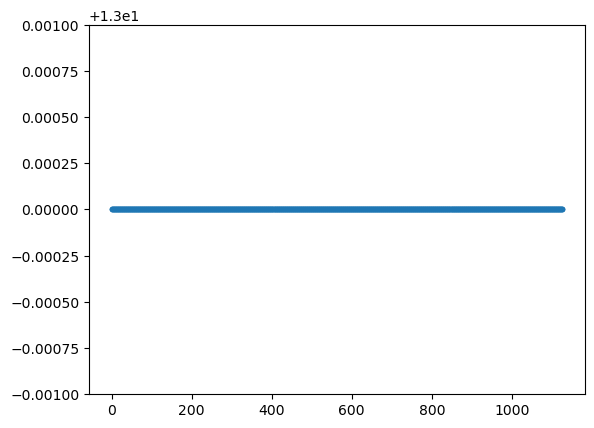

In [10]:
plt.plot(oct_density,".")
plt.ylim(12.999, 13.001)